<center><b>© Content is made available under the CC-BY-NC-ND 4.0 license. Christian Lopez, lopezbec@lafayette.edu<center>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/lopezbec/intro_python_notebooks/blob/master/Overfitting_and_Underfitting_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
      </table>
        <br><br></br> 


#Introduction to Overfitting and Underfitting

 This notebook gives you a brief introduction to the issues of Overfitting and Underfitting in Machine Learning, with a focus on Linear Regression
<br>

Most of the notebooks we are going to be using are inspired from existing notebooks that available online and are made  free for educational purposes. Nonetheless, this notebook should not be share without prior permission of the instructor. When working in an assignment always remember the [Student Code of Conduct]( https://conduct.lafayette.edu/student-handbook/student-code-of-conduct/).  


*The following sections were inspired and uses code and text from the notebook:

Géron, A. (2019)   2nd Ed. Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. O'Reilly Media, Inc.( ISBN-10: 1491962291) [Chapter 4:](https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb)


# Setup

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
#Scikit-learn for implemeting LinearRegression from a existing algorithm.
from sklearn.linear_model import LinearRegression

# Common imports
import numpy as np
import os

from IPython.display import clear_output

# to make this notebook's output stable across runs
np.random.seed(42)
np.random.seed(124)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")



Lets look at a smaller (m=20) and less "noisy" dataset 

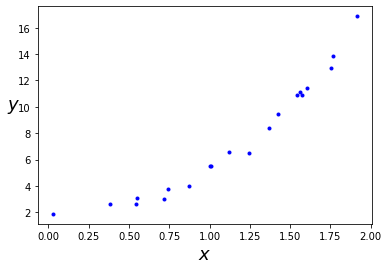

In [3]:

np.random.seed(12)
np.random.seed(1234)
X = 2 * np.random.rand(20, 1)
y = 2 - 2 * X  + 5* X**2+ (0.5*np.random.randn(20, 1))
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

### What happen to our cost as we implement more features in our model?



Text(0.25, 15, 'Cost=0.0725')

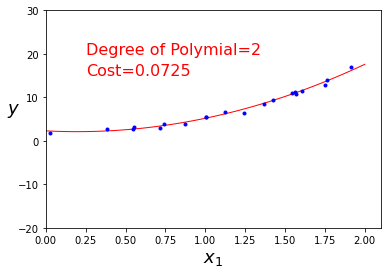

In [6]:

def computeCost(X, y, theta):
    return 1/(2*y.size)*np.sum(np.square(X.dot(theta)-y))

#Create polynomial features
from sklearn.preprocessing import PolynomialFeatures
Degree_of_the_Polynomial_Model=2 #@param {type:"integer", min:1, max:14, step:1}
poly_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)
X_poly = poly_features.fit_transform(X)

#Fit model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

#Compute cost
coe=lin_reg.coef_
interc=lin_reg.intercept_
coe=coe.reshape(coe.size,1)
interc=interc.reshape(interc.size,1)
theta_p=np.vstack([interc,coe])
##Add X_0= ones for our intercept
X_new_poly2 = np.hstack([np.ones(shape=(y.size,1)), X_poly])
cost=computeCost(X_new_poly2, y, theta_p)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
X_new=np.linspace(0, 2, 100).reshape(100, 1)

style="g-" 
width=1
degree=Degree_of_the_Polynomial_Model

polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()


polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)



plt.plot(X_new, y_newbig, "r", linewidth=width)
plt.text(0.25, 20,"Degree of Polymial={}".format(degree), fontsize=16, color="r")



plt.plot(X, y, "b.", linewidth=3)

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2.1, -20, 30])

plt.text(0.25, 15,"Cost={}".format(round(cost,4)), fontsize=16, color="r")


Text(0.25, 15, 'Cost=0.0537')

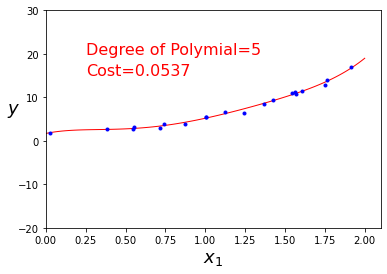

In [8]:

def computeCost(X, y, theta):
    return 1/(2*y.size)*np.sum(np.square(X.dot(theta)-y))

#Create polynomial features
from sklearn.preprocessing import PolynomialFeatures
Degree_of_the_Polynomial_Model=5 #@param {type:"integer", min:1, max:14, step:1}
poly_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)
X_poly = poly_features.fit_transform(X)

#Fit model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

#Compute cost
coe=lin_reg.coef_
interc=lin_reg.intercept_
coe=coe.reshape(coe.size,1)
interc=interc.reshape(interc.size,1)
theta_p=np.vstack([interc,coe])
##Add X_0= ones for our intercept
X_new_poly2 = np.hstack([np.ones(shape=(y.size,1)), X_poly])
cost=computeCost(X_new_poly2, y, theta_p)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
X_new=np.linspace(0, 2, 100).reshape(100, 1)

style="g-" 
width=1
degree=Degree_of_the_Polynomial_Model

polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()


polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)



plt.plot(X_new, y_newbig, "r", linewidth=width)
plt.text(0.25, 20,"Degree of Polymial={}".format(degree), fontsize=16, color="r")



plt.plot(X, y, "b.", linewidth=3)

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2.1, -20, 30])

plt.text(0.25, 15,"Cost={}".format(round(cost,4)), fontsize=16, color="r")


Polynomial order with min cost: 21


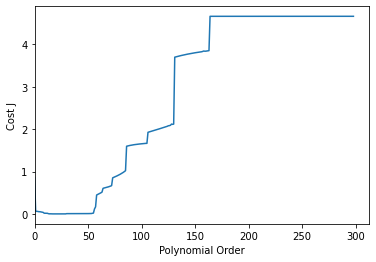

In [ ]:


costL=[]


for d in range(1,300):
    #Create polynomial features
    from sklearn.preprocessing import PolynomialFeatures


    Degree_of_the_Polynomial_Model=d
    poly_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)
    X_poly = poly_features.fit_transform(X)

    #Fit model
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)

    #Compute cost
    coe=lin_reg.coef_
    interc=lin_reg.intercept_
    coe=coe.reshape(coe.size,1)
    interc=interc.reshape(interc.size,1)
    theta_p=np.vstack([interc,coe])
    ##Add X_0= ones for our intercept
    X_new_poly2 = np.hstack([np.ones(shape=(y.size,1)), X_poly])
    cost=computeCost(X_new_poly2, y, theta_p)

    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import Pipeline
    from sklearn.metrics import mean_squared_error, r2_score
    X_new=np.linspace(0, 2, 100).reshape(100, 1)

    style="g-" 
    width=1
    degree=Degree_of_the_Polynomial_Model

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()


    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)

    costL.append(cost)

plt.plot(costL)
plt.xlim(xmin=0.0)
plt.ylabel('Cost J')
plt.xlabel('Polynomial Order')
print("Polynomial order with min cost:",costL.index(min(costL)))

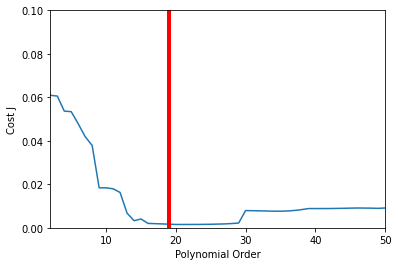

In [ ]:
plt.plot(costL)
plt.xlim(xmin=2,xmax=50)
plt.ylim(ymin=0,ymax=0.1)
plt.ylabel('Cost J')
plt.xlabel('Polynomial Order')
plt.axvline(x=19,linewidth=4, color='r')

Look at the trend of the cost function as the order of the polynomial approaches (m-1), and after m. 

##But why are we training a LR model? What is the goal we are trying to achieve?
(Go back to ppt)


Let’s plot the same data with a high polynomial model, but this time let’s look at the 'whole plot'

Text(0, 0.5, '$y$')

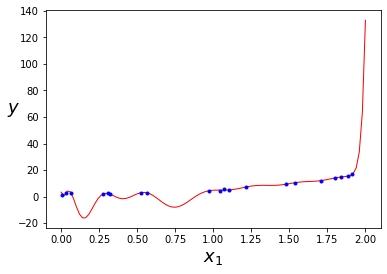

In [ ]:

np.random.seed(12)
X = 2 * np.random.rand(20, 1)
y = 2 - 2 * X  + 5* X**2+ (0.5*np.random.randn(20, 1))

#Create polynomial features
from sklearn.preprocessing import PolynomialFeatures
Degree_of_the_Polynomial_Model=18 #@param {type:"integer", min:1, max:14, step:1}
poly_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)
X_poly = poly_features.fit_transform(X)

#Fit model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

#Compute cost
coe=lin_reg.coef_
interc=lin_reg.intercept_
coe=coe.reshape(coe.size,1)
interc=interc.reshape(interc.size,1)
theta_p=np.vstack([interc,coe])
##Add X_0= ones for our intercept
X_new_poly2 = np.hstack([np.ones(shape=(y.size,1)), X_poly])
cost=computeCost(X_new_poly2, y, theta_p)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
X_new=np.linspace(0, 2, 100).reshape(100, 1)

style="g-" 
width=1
degree=Degree_of_the_Polynomial_Model

polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()


polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)



plt.plot(X_new, y_newbig, "r", linewidth=width)
#plt.text(0.25, 20,"Degree of Polymial={}".format(degree), fontsize=16, color="r")



plt.plot(X, y, "b.", linewidth=3)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
#plt.axis([0, 2.1, -20, 30])

#plt.text(0.25, 15,"Cost={}".format(round(cost,4)), fontsize=16, color="r")


Lets go back to our bigger dataset (m=100)

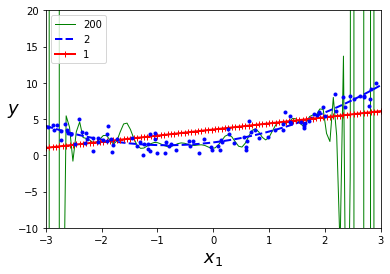

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 200), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
y_min=-10 #@param {type:"integer",step:5}
y_max=20 #@param {type:"integer",step:5}
plt.axis([-3, 3, y_min, y_max])
plt.show()

#Which of this model will GENERALIZE better?

Lets try different models  (1,2,5,10, 15)

Polynomial model Degree =2


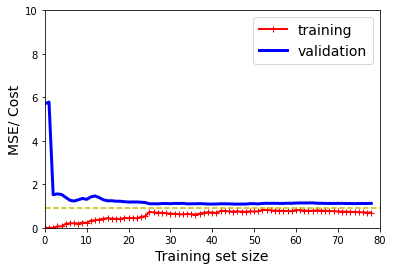

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    np.random.seed(12)
    np.random.seed(122334)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot((train_errors), "r-+", linewidth=2, label="training")
    plt.plot((val_errors), "b-", linewidth=3, label="validation")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("MSE/ Cost", fontsize=14)              # not shown

from sklearn.pipeline import Pipeline

Degree_of_the_Polynomial_Model=2 #@param {type:"integer", min:1, max:14, step:1}
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 10])           # not shown               # not shown in the book
plt.axhline(y=0.9, color='y', linestyle='--')
print("Polynomial model Degree ={}".format(Degree_of_the_Polynomial_Model))

Lets compare models  degree= 15 vs degree=2 vs degree=1

Polynomial model Degree =15


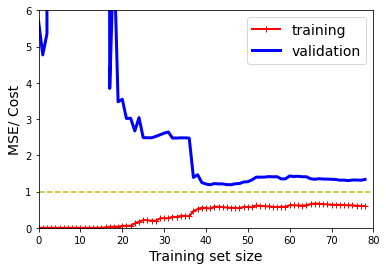

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    np.random.seed(12)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot((train_errors), "r-+", linewidth=2, label="training")
    plt.plot((val_errors), "b-", linewidth=3, label="validation")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("MSE/ Cost", fontsize=14)              # not shown

from sklearn.pipeline import Pipeline

Degree_of_the_Polynomial_Model=15 #@param {type:"integer", min:1, max:14, step:1}
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 6])           # not shown               # not shown in the book
plt.axhline(y=1, color='y', linestyle='--')
print("Polynomial model Degree ={}".format(Degree_of_the_Polynomial_Model))

One way to improve an overfitting model is to feed it more training
data until the validation error reaches the training error.

Polynomial model Degree =2


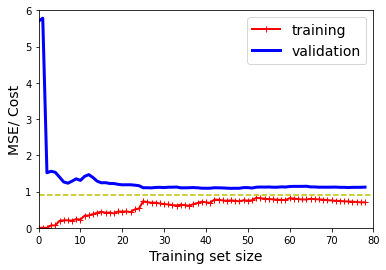

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    np.random.seed(12)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot((train_errors), "r-+", linewidth=2, label="training")
    plt.plot((val_errors), "b-", linewidth=3, label="validation")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("MSE/ Cost", fontsize=14)              # not shown

from sklearn.pipeline import Pipeline

Degree_of_the_Polynomial_Model=2 #@param {type:"integer", min:1, max:14, step:1}
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 6])           # not shown               # not shown in the book
plt.axhline(y=0.9, color='y', linestyle='--')
print("Polynomial model Degree ={}".format(Degree_of_the_Polynomial_Model))

Polynomial model Degree =1


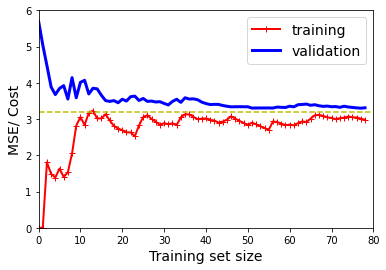

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    np.random.seed(12)
    np.random.seed(12234)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot((train_errors), "r-+", linewidth=2, label="training")
    plt.plot((val_errors), "b-", linewidth=3, label="validation")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("MSE/ Cost", fontsize=14)              # not shown

from sklearn.pipeline import Pipeline

Degree_of_the_Polynomial_Model=1 #@param {type:"integer", min:1, max:14, step:1}
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 6])           # not shown               # not shown in the book
plt.axhline(y=3.2, color='y', linestyle='--')
print("Polynomial model Degree ={}".format(Degree_of_the_Polynomial_Model))

If your model is underfitting the training data, adding more training
examples will not help. You need to use a more complex model
or come up with better features.

#[Occam's razor principle](https://simple.wikipedia.org/wiki/Occam%27s_razor)

Go to PPT